# PlotTemperature2005-2014



The data for this script is sourced from a subset of the National Centers for Environmental Information (NCEI) Global Historical Climatology Network daily (GHCNd) https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily (GHCN-Daily). This dataset includes daily climate records from numerous land surface stations around the world and is stored in the file: `assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

What you expect to see is an image that looks like this hand-drawn sketch:

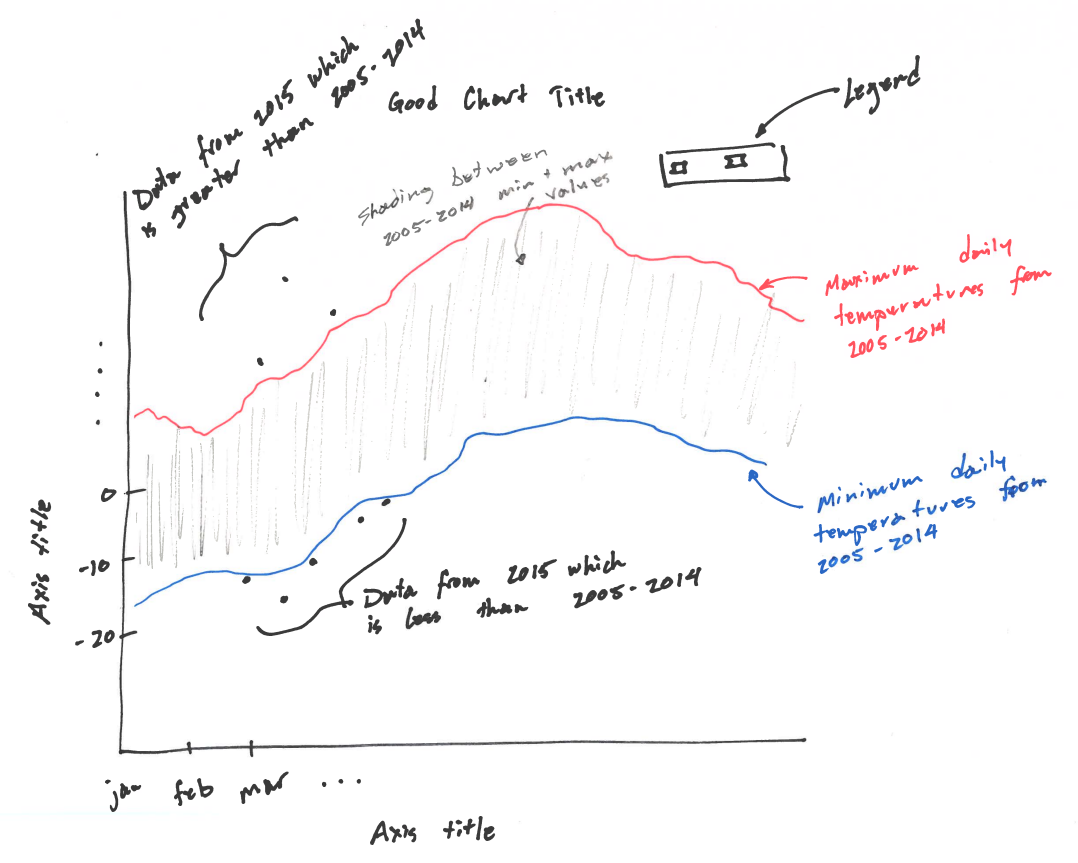


## Stage 1
Load the dataset and transform the data into Celsius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.

In [28]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [29]:
# Ordenar el DataFrame por la columna 'Date'
df = df.sort_values("Date")

# Filtrar fechas de la década
decade = df[(df["Date"] >= "2005-01-01") & (df["Date"] < "2015-01-01")].copy()

# Convertir la columna 'Date' a formato fecha
decade.loc[:, "Date"] = pd.to_datetime(decade["Date"])

# Crear columna con el número del mes
decade.loc[:, "Month"] = pd.DatetimeIndex(decade['Date']).month

# Crear columna con el número del día
decade.loc[:, "Day"] = pd.DatetimeIndex(decade['Date']).day
decade

,ID,Date,Element,Data_Value,Month,Day
60995,USW00004848,2005-01-01 00:00:00,TMIN,0,1,1
17153,USC00207320,2005-01-01 00:00:00,TMAX,150,1,1
17155,USC00207320,2005-01-01 00:00:00,TMIN,-11,1,1
10079,USW00014833,2005-01-01 00:00:00,TMIN,-44,1,1
10073,USW00014833,2005-01-01 00:00:00,TMAX,33,1,1
...,...,...,...,...,...,...
61837,USC00202308,2014-12-31 00:00:00,TMIN,-100,12,31
45478,USC00205563,2014-12-31 00:00:00,TMAX,-28,12,31
46667,USC00205451,2014-12-31 00:00:00,TMIN,-111,12,31
45477,USC00205563,2014-12-31 00:00:00,TMIN,-117,12,31


## Stage 2
To visualize the data, we will plot the minimum and maximum temperatures for each day of the year from 2005 to 2014 across all weather stations. Additionally, we need to identify when the minimum or maximum temperature in 2015 falls below or rises above the respective minimum or maximum of the previous decade.

In the first stage, we have two Series objects representing the minimum and maximum temperatures from 2005 through 2015. You can utilize Pandas `groupby` to create these Series objects for each day across all weather stations for these years, handling February 29 (leap year) records by removing them.

In [30]:
# Agrupar por mes y día
t_max = decade.groupby(['Month', 'Day']).max()
t_min = decade.groupby(['Month', 'Day']).min()

# Separar temperaturas máximas de mínimas
t_max = t_max.reset_index()
t_min = t_min.reset_index()

# Eliminar datos del 29 de febrero
t_max = t_max.drop(t_max[(t_max['Day'] == 29) & (t_max['Month'] == 2)].index)
t_min = t_min.drop(t_min[(t_min['Day'] == 29) & (t_min['Month'] == 2)].index)

t_max = t_max.reset_index(drop=True)
t_min = t_min.reset_index(drop=True)

# Sacar datos solamente del 2015
year_2015 = df[(df['Date'] >= '2015-01-01')].copy()

# Convertir la columna 'Date' a formato fecha
year_2015.loc[:, 'Date'] = pd.to_datetime(year_2015['Date'])

# Crear columnas con número de mes y día
year_2015['Month'] = pd.DatetimeIndex(year_2015['Date']).month
year_2015['Day'] = pd.DatetimeIndex(year_2015['Date']).day

# Agrupar por fecha y obtener las temperaturas máximas y mínimas
year_2015_max = year_2015.groupby('Date').max().reset_index()
year_2015_min = year_2015.groupby('Date').min().reset_index()

# Imprimir formas y columnas para verificar
# print(year_2015_max.shape)
# print(year_2015_min.shape)
#print(year_2015_min.columns)
#print(year_2015_max.columns)

## Stage 3

Create all-time highs and labels for each month.

In [31]:
import numpy as np
import pandas as pd
#Maximo historico

record_high = year_2015_max[year_2015_max['Data_Value'] > t_max['Data_Value']]
record_low = year_2015_min[year_2015_min['Data_Value'] < t_min['Data_Value']]

#Etiquetas del eje x

xticks = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dic']
print(xticks_labels)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dic']


## Stage 4

Finally it is plotted, using matplotlib to plot linear graphs of the minimum and maximum temperatures for the years 2005 to 2014 and to plot scatterplots __only__ the 2015 daily temperatures that exceeded those values.

<Figure size 640x480 with 0 Axes>

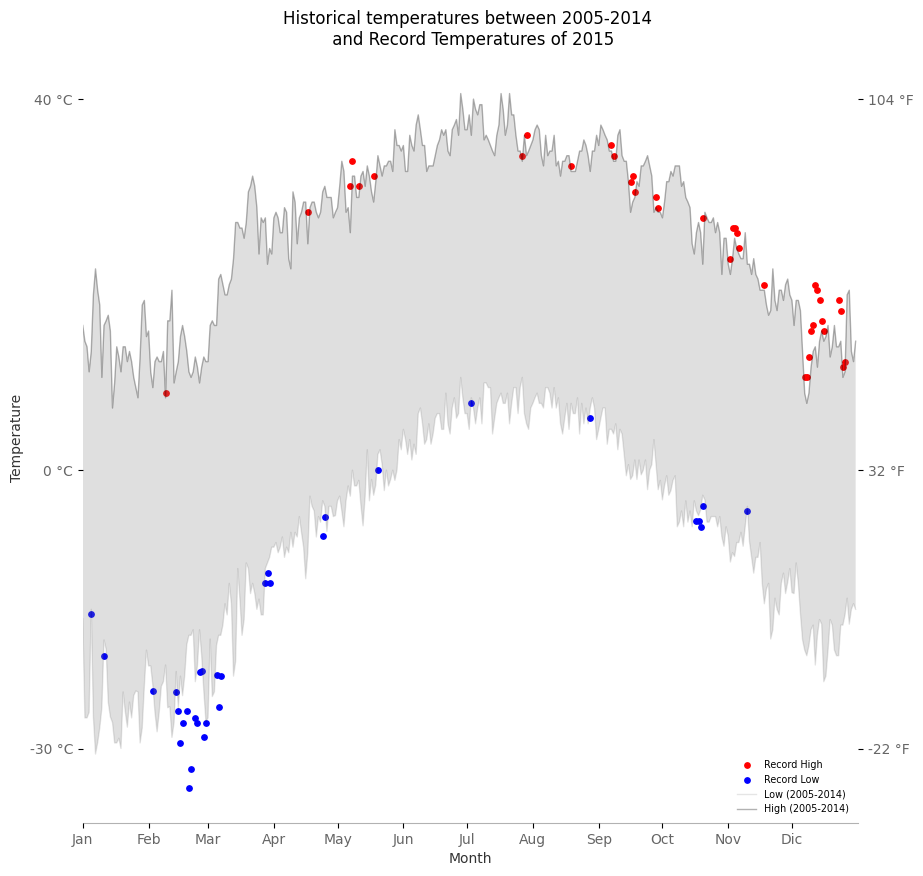

In [32]:
import matplotlib.pyplot as plt
from calendar import month_abbr


plt.figure()
plt.figure(figsize=(10, 10))

ax1 = plt.gca() # Eje principal
ax2 = ax1.twinx() # Eje secundario

plt.scatter(record_high.index,record_high['Data_Value'], color = 'r', s = 15)
plt.scatter(record_low.index,record_low['Data_Value'], color = 'b', s = 15)

ax2.plot(t_min['Data_Value'], '-',color ='k', alpha = 0.1,  linewidth=1)
ax2.plot(t_max['Data_Value'],'-', color ='k', alpha = 0.3,  linewidth=1)
ax2.fill_between(t_min.index, t_min['Data_Value'], t_max['Data_Value'], facecolor='gray', alpha=0.25)

#Etiquetar eje x y el titulo principal
ax2.set_xlim(0,365)
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels, alpha = 0.6)
ax1.set_xticklabels(xticks_labels, alpha = 0.6)
ax2.set_title('Historical temperatures between 2005-2014 \n and Record Temperatures of 2015')

# Etiquetar el eje y
axlim = ax1.set_ylim(-380,450)     #Establece el rango del eje a mostrar
yticks = pd.Series([-300,0,400])   #Crea una Serie de pandas con -300, 0 y 400.
ax1.set_yticks(yticks)             #Establece los ticks del eje y (ax1) con los valores definidos en la Serie yticks.

#Pasar a grados centigrados

ylabels = pd.Series(yticks/10).astype(int).astype(str) + ' °C' #Crea una nueva Serie. Divide yticks por 10, convierte los resultados en enteros y luego en texto. Luego, agrega " °C" al final.
ax1.set_yticklabels(ylabels, alpha = 0.6)                     #Establece las etiquetas del eje y (ax1) utilizando las etiquetas personalizadas definidas en ylabels

# Etiquetas del eje y secundario
#convertir a fahrenheit de celcius
ax2.set_ylim(axlim)
ax2.set_yticks(yticks)
yticks_ax2 = (yticks/10 *  (9/5) + 32).astype(int)
ylabels_ax2 = pd.Series(yticks_ax2).astype(int).astype(str) + ' °F'
ax2.set_yticklabels(ylabels_ax2, alpha = 0.6)

# Quitar el enmarcado del
for spine in ax2.spines:
    ax2.spines[spine].set_visible(False)
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)

ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.3)

# Etiquetas de eje
ax1.set_xlabel('Month', alpha = 0.8)
ax1.set_ylabel('Temperature' , alpha = 0.8)

# legend
leg = ax2.legend(loc=4,labels = ['Record High','Record Low','Low (2005-2014)','High (2005-2014)'], frameon = False, fontsize = 'x-small')


plt.savefig('Plot_assignament2.png', dpi=300)
